[View in Colaboratory](https://colab.research.google.com/github/blamassa/wind_analysis/blob/master/Wind.ipynb)

# Potencial Eólico da Palestina

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
lista = [
    'station_no lon lat h_m mean_ms std_ms',
    '400800 33.42 36.52 609 4.47 3.10',
    '401530 32.97 35.50 934 4.77 2.39',
    '401790 32.00 34.82 35 2.78 1.62',
    '401800 32.00 34.90 49 2.97 1.56',
    '401830 31.77 35.22 815 3.24 1.51',
    '402550 32.55 35.85 616 3.15 1.87',
    '402600 32.20 37.13 674 5.22 3.18',
    '402650 32.37 36.25 683 3.83 2.44',
    '402700 31.98 35.98 779 3.39 2.03',
    '402720 31.72 35.98 722 4.80 2.92',
    '403600 31.40 37.28 504 4.39 2.88',
    '623370 31.08 33.82 32 2.45 1.49',
    'JEN00001 35.30 32.47 178 3.80 2.61',
    'TUL00002 35.02 32.32 83 3.24 2.01',    
    'NAB00003 35.25 32.22 570 3.24 1.71',
    'RAM00004 35.20 31.88 856 5.64 3.09',    
    'JER00005 35.45 31.85 -260 2.71 1.73',
    'BET00007 35.20 31.70 773 3.24 1.86',    
    'HEB00008 35.10 31.53 1005 4.69 2.39',
    'DUM0009 35.37 32.05 595 3.68 2.60'   
    
]

In [0]:
lista_lista = []

for i in lista:
  lista_lista.append(i.split(' '))

In [0]:
df = pd.DataFrame(lista_lista)
header = df.iloc[0]
df = df[1:]
df = df.rename(columns = header)
df[['lon','lat','h_m','mean_ms','std_ms']] = df[['lon','lat','h_m','mean_ms','std_ms']].apply(pd.to_numeric)
#df = df[12:-1] #tirando os que nao estao em territorio palestino

In [5]:
df

,station_no,lon,lat,h_m,mean_ms,std_ms
1,400800,33.42,36.52,609,4.47,3.10
2,401530,32.97,35.50,934,4.77,2.39
3,401790,32.00,34.82,35,2.78,1.62
4,401800,32.00,34.90,49,2.97,1.56
5,401830,31.77,35.22,815,3.24,1.51
6,402550,32.55,35.85,616,3.15,1.87
7,402600,32.20,37.13,674,5.22,3.18
8,402650,32.37,36.25,683,3.83,2.44
9,402700,31.98,35.98,779,3.39,2.03
10,402720,31.72,35.98,722,4.80,2.92


## Perfil vertical do vento
### Classificando o relevo da região



| Terreno | z_o|
|--------------|----|
| Cidades, Florestas | 0.7 |
| Subúrbios | 0.3 |
| Vilarejos | 0.1 |
| Poucas arvores | 0.03 |
| Planicies gramadas | 0.01 |
| Deserto plano | 0.001 |



In [0]:
rugosidades = [
    0.3, #suburbio
    0.1, # vilarejo
    0.7, # cidade
    0.3, #suburbio
    0.001, #deserto plano
    0.7, # cidade
    0.3 #suburbio
]

### Lei logarítmica

$$v(h) = v_{ref} \frac{ln(h/z_o)}{ln(h_{ref}/z_o)}$$

onde $h_{ref}$ representa a altura de referência da medida da velocidade, $v_{ref}$ a velocidade
nesta altura de referência e $z_o$ é o comprimento de rugosidade.
http://www.sbmet.org.br/cbmet2010/artigos/474_65917.pdf


In [0]:
def lei_log(v_ref,h,z_o,h_ref = 10):
  return v_ref*(np.log(h/z_o)/np.log(h_ref/z_o))

In [8]:
df_leilog = pd.DataFrame()
df_leilog[['station','lon','lat','h_m','v_10m']] = df[['station_no','lon','lat','h_m','mean_ms']][12:-1].reset_index(drop=True)
pd_rugo = pd.DataFrame(rugosidades)
df_leilog['z_o'] = pd_rugo
df_leilog

,station,lon,lat,h_m,v_10m,z_o
0,JEN00001,35.30,32.47,178,3.80,0.300
1,TUL00002,35.02,32.32,83,3.24,0.100
2,NAB00003,35.25,32.22,570,3.24,0.700
3,RAM00004,35.20,31.88,856,5.64,0.300
4,JER00005,35.45,31.85,-260,2.71,0.001
5,BET00007,35.20,31.70,773,3.24,0.700
6,HEB00008,35.10,31.53,1005,4.69,0.300


#### Extrapolando para 30, 50, 80, e 100 m

In [0]:
df_leilog['v_30m'] = lei_log(df_leilog['v_10m'],30,df_leilog['z_o'])
df_leilog['v_50m'] = lei_log(df_leilog['v_10m'],50,df_leilog['z_o'])
df_leilog['v_80m'] = lei_log(df_leilog['v_10m'],80,df_leilog['z_o'])
df_leilog['v_100m'] = lei_log(df_leilog['v_10m'],100,df_leilog['z_o'])

In [10]:
df_leilog

,station,lon,lat,h_m,v_10m,z_o,v_30m,v_50m,v_80m,v_100m
0,JEN00001,35.30,32.47,178,3.80,0.300,4.990548,5.544122,6.053457,6.295274
1,TUL00002,35.02,32.32,83,3.24,0.100,4.012936,4.372331,4.703006,4.860000
2,NAB00003,35.25,32.22,570,3.24,0.700,4.578532,5.200913,5.773558,6.045433
3,RAM00004,35.20,31.88,856,5.64,0.300,7.407024,8.228644,8.984605,9.343512
4,JER00005,35.45,31.85,-260,2.71,0.001,3.033250,3.183552,3.321843,3.387500
5,BET00007,35.20,31.70,773,3.24,0.700,4.578532,5.200913,5.773558,6.045433
6,HEB00008,35.10,31.53,1005,4.69,0.300,6.159387,6.842613,7.471240,7.769694


## Densidade de potencial eólico
$$ \frac{P_{eol}}{A} =  \rho \cdot \frac{v^3}{2}$$
Onde $\rho$ é a densidade do ar no Local. Padrão = 1.225

In [0]:
def potEolico(v, rho=1.225):
  return rho/2 * v**3

In [0]:
df_leilog['pot_10m'] = potEolico(df_leilog['v_10m'])
df_leilog['pot_30m'] = potEolico(df_leilog['v_30m'])
df_leilog['pot_50m'] = potEolico(df_leilog['v_50m'])
df_leilog['pot_80m'] = potEolico(df_leilog['v_80m'])
df_leilog['pot_100m'] = potEolico(df_leilog['v_100m'])

In [13]:
df_leilog

,station,lon,lat,h_m,v_10m,z_o,v_30m,v_50m,v_80m,v_100m,pot_10m,pot_30m,pot_50m,pot_80m,pot_100m
0,JEN00001,35.30,32.47,178,3.80,0.300,4.990548,5.544122,6.053457,6.295274,33.609100,76.129135,104.376897,135.867788,152.809390
1,TUL00002,35.02,32.32,83,3.24,0.100,4.012936,4.372331,4.703006,4.860000,20.832487,39.581562,51.197094,63.713671,70.309644
2,NAB00003,35.25,32.22,570,3.24,0.700,4.578532,5.200913,5.773558,6.045433,20.832487,58.787469,86.167795,117.879092,135.328204
3,RAM00004,35.20,31.88,856,5.64,0.300,7.407024,8.228644,8.984605,9.343512,109.886263,248.907175,341.264335,444.225031,499.616259
4,JER00005,35.45,31.85,-260,2.71,0.001,3.033250,3.183552,3.321843,3.387500,12.190288,17.093483,19.762506,22.451408,23.809156
5,BET00007,35.20,31.70,773,3.24,0.700,4.578532,5.200913,5.773558,6.045433,20.832487,58.787469,86.167795,117.879092,135.328204
6,HEB00008,35.10,31.53,1005,4.69,0.300,6.159387,6.842613,7.471240,7.769694,63.186547,143.126032,196.233034,255.437257,287.288194


In [0]:
df_plots = df_leilog[['v_10m','v_30m','v_50m','v_80m','v_100m']].T
df_plots.columns = ['JEN','TUL','NAB','RAM', 'JER','BET','HEB']

In [15]:
df_plots

,JEN,TUL,NAB,RAM,JER,BET,HEB
v_10m,3.800000,3.240000,3.240000,5.640000,2.710000,3.240000,4.690000
v_30m,4.990548,4.012936,4.578532,7.407024,3.033250,4.578532,6.159387
v_50m,5.544122,4.372331,5.200913,8.228644,3.183552,5.200913,6.842613
v_80m,6.053457,4.703006,5.773558,8.984605,3.321843,5.773558,7.471240
v_100m,6.295274,4.860000,6.045433,9.343512,3.387500,6.045433,7.769694


# Visualizações

### Perfil vertical do vento

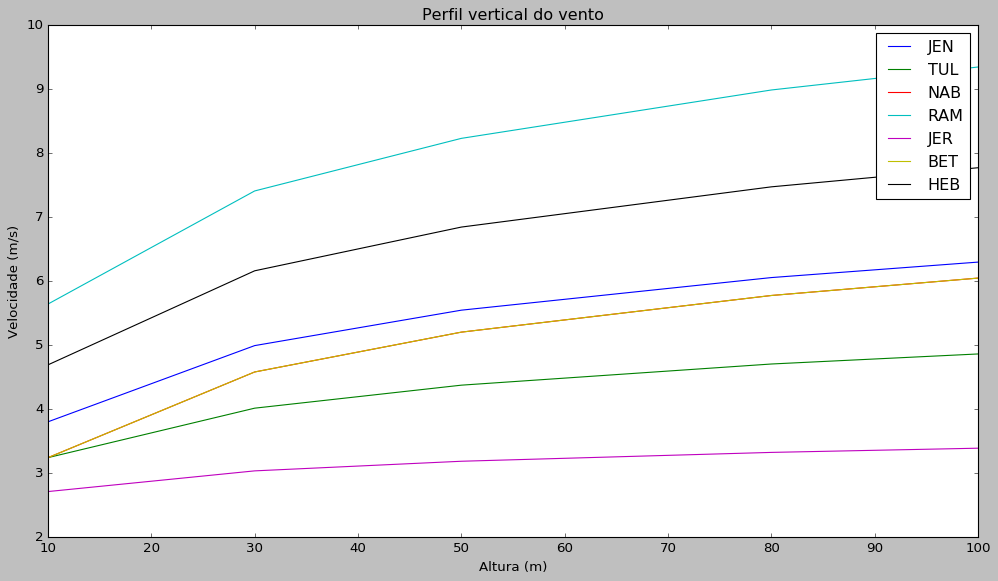

In [16]:
velocidades = [10,30,50,80,100]
plt.style.use('classic')

plt.figure(figsize=(15,8))

plt.plot(velocidades, df_plots['JEN'], label='JEN')
plt.plot(velocidades, df_plots['TUL'], label='TUL')
plt.plot(velocidades, df_plots['NAB'], label='NAB')
plt.plot(velocidades, df_plots['RAM'], label='RAM')
plt.plot(velocidades, df_plots['JER'], label='JER')
plt.plot(velocidades, df_plots['BET'], label='BET')
plt.plot(velocidades, df_plots['HEB'], label='HEB')
plt.legend()

plt.xlim(10,100)

plt.xlabel('Altura (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Perfil vertical do vento')

plt.show()

### Densidade de potencia

In [0]:
df_plotsPot = df_leilog[['pot_10m','pot_30m','pot_50m','pot_80m','pot_100m']].T
df_plotsPot.columns = ['JEN','TUL','NAB','RAM', 'JER','BET','HEB']

In [18]:
df_plotsPot

,JEN,TUL,NAB,RAM,JER,BET,HEB
pot_10m,33.609100,20.832487,20.832487,109.886263,12.190288,20.832487,63.186547
pot_30m,76.129135,39.581562,58.787469,248.907175,17.093483,58.787469,143.126032
pot_50m,104.376897,51.197094,86.167795,341.264335,19.762506,86.167795,196.233034
pot_80m,135.867788,63.713671,117.879092,444.225031,22.451408,117.879092,255.437257
pot_100m,152.809390,70.309644,135.328204,499.616259,23.809156,135.328204,287.288194


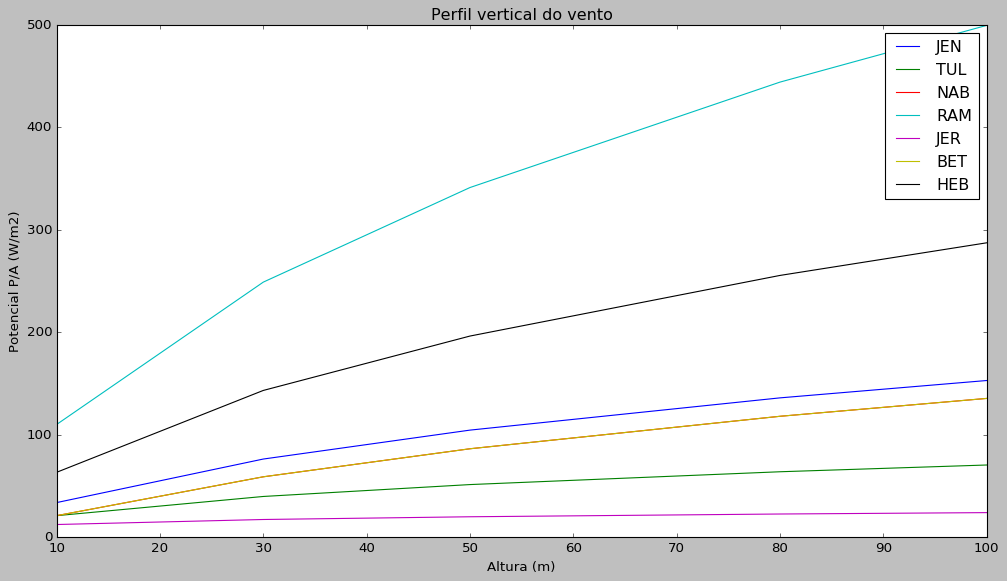

In [19]:
velocidades = [10,30,50,80,100]
plt.style.use('classic')

plt.figure(figsize=(15,8))

plt.plot(velocidades, df_plotsPot['JEN'], label='JEN')
plt.plot(velocidades, df_plotsPot['TUL'], label='TUL')
plt.plot(velocidades, df_plotsPot['NAB'], label='NAB')
plt.plot(velocidades, df_plotsPot['RAM'], label='RAM')
plt.plot(velocidades, df_plotsPot['JER'], label='JER')
plt.plot(velocidades, df_plotsPot['BET'], label='BET')
plt.plot(velocidades, df_plotsPot['HEB'], label='HEB')
plt.legend()

plt.xlim(10,100)

plt.xlabel('Altura (m)')
plt.ylabel('Potencial P/A (W/m2)')
plt.title('Perfil vertical do vento')

plt.show()

# Mapa

In [20]:
!pip install folium

    100% |████████████████████████████████| 81kB 4.4MB/s 


In [0]:
import folium

In [0]:
m = folium.Map(
    location=[31.8, 35.2],
    zoom_start=9,
    tiles='Stamen Terrain'
)

In [23]:
m = folium.Map(
    location=[31.8, 35.2],
    zoom_start=9,
    tiles='Stamen Terrain'
)

tooltip = [' ']
for medicao in range(len(df))[1:]:
  tooltip.append(str(df.mean_ms[medicao])+'m/s')

for medicao in range(len(df))[1:]:
  folium.Marker([df.lat[medicao],df.lon[medicao]], popup = tooltip[medicao], tooltip=df.station_no[medicao]).add_to(m) #tooltip[medicao]

#folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)

m

In [24]:
folium.CircleMarker(location=[31.8, 35.2], radius=50,
                    popup='Laurelhurst Park',
                    fill_color='#3186cc').add_to(m)

In [25]:
df_leilog

,station,lon,lat,h_m,v_10m,z_o,v_30m,v_50m,v_80m,v_100m,pot_10m,pot_30m,pot_50m,pot_80m,pot_100m
0,JEN00001,35.30,32.47,178,3.80,0.300,4.990548,5.544122,6.053457,6.295274,33.609100,76.129135,104.376897,135.867788,152.809390
1,TUL00002,35.02,32.32,83,3.24,0.100,4.012936,4.372331,4.703006,4.860000,20.832487,39.581562,51.197094,63.713671,70.309644
2,NAB00003,35.25,32.22,570,3.24,0.700,4.578532,5.200913,5.773558,6.045433,20.832487,58.787469,86.167795,117.879092,135.328204
3,RAM00004,35.20,31.88,856,5.64,0.300,7.407024,8.228644,8.984605,9.343512,109.886263,248.907175,341.264335,444.225031,499.616259
4,JER00005,35.45,31.85,-260,2.71,0.001,3.033250,3.183552,3.321843,3.387500,12.190288,17.093483,19.762506,22.451408,23.809156
5,BET00007,35.20,31.70,773,3.24,0.700,4.578532,5.200913,5.773558,6.045433,20.832487,58.787469,86.167795,117.879092,135.328204
6,HEB00008,35.10,31.53,1005,4.69,0.300,6.159387,6.842613,7.471240,7.769694,63.186547,143.126032,196.233034,255.437257,287.288194


In [0]:
from folium import FeatureGroup

In [27]:
m = folium.Map(
    location=[31.8, 35.2],
    zoom_start=9,
    tiles='Stamen Terrain'
)


feature_group = FeatureGroup(name='Potencial 100m')

for medicao in range(len(df_leilog)):
  feature_group.add_child(folium.CircleMarker(location=[df_leilog.lat[medicao],df_leilog.lon[medicao]], 
                    radius=df_leilog.pot_100m[medicao]/10,
                    tooltip=str("{0:.2f}".format(round(df_leilog.pot_100m[medicao],2)))+'W/m2',
                    fill_color='#3186cc'))
  
m.add_child(feature_group)

feature_group2 = FeatureGroup(name='Estações')

tooltip = [' ']
for medicao in range(len(df))[1:]:
  tooltip.append(str(df.mean_ms[medicao])+'m/s')

for medicao in range(len(df))[1:]:
  feature_group2.add_child(folium.Marker([df.lat[medicao],df.lon[medicao]], popup = tooltip[medicao], tooltip=df.station_no[medicao])) #tooltip[medicao]
  
m.add_child(feature_group2)
m.add_child(folium.map.LayerControl())
#folium.LayerControl().add_to(m)
m